In [142]:
import matplotlib.pyplot as plt
import numpy as np
import time

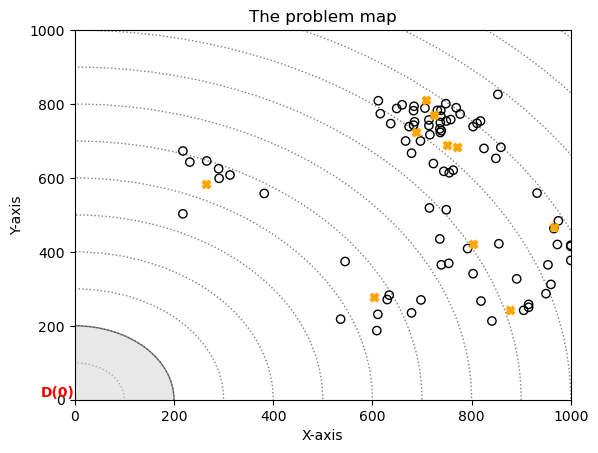

In [160]:
%run Model.ipynb

In [154]:
problems = load_problems("/Users/simonhusebo/Dokumenter/MASTERS CODE/data")

Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]


<Axes: title={'center': 'The problem map'}, xlabel='X-axis', ylabel='Y-axis'>

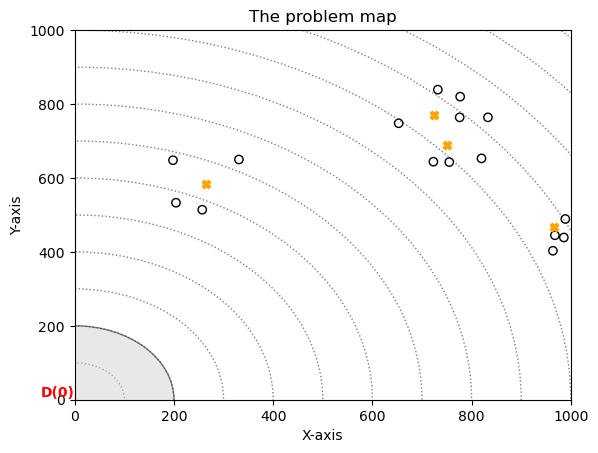

In [155]:
problem = problems[0]
n_trips = problem['N_trips']
initial = initial_solution(problem,n_trips)
operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert,random_remove_kregret_insert,largest_trip_remove_kregret_insert,similarity_removal_kregret_insert]#,clustering_removal_kncs_greedy_insert,clustering_removal_krd_greedy_insert]
weights = [1/4,1/4,1/4,1/16,1/16]
show_the_map(problem)

In [156]:
#sol,cost,n_feasible,cost_movement = simple_sim_annealing(inital,problem,operators,probabilities)

In [161]:
best_solution,processed_best,best_cost,best_costs,costs,all_weights,all_scores,all_used,final_improvement,unique,accept_list = ALNS(initial,problem,operators)
print(best_cost)

Escape at 4257
Escape at 8389
Escape at 10904
Escape at 16384
Escape at 19048
68319.885


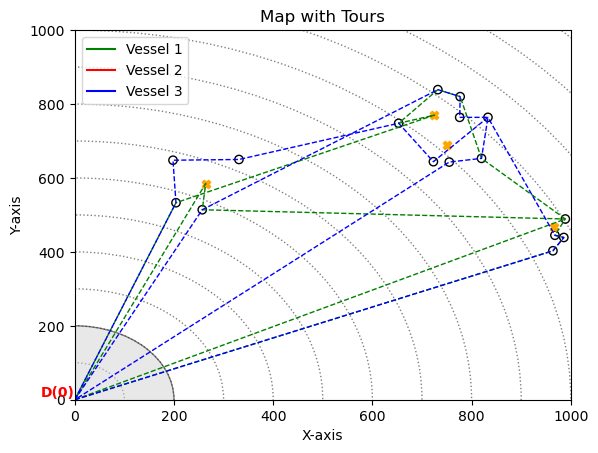

In [162]:
# Create the base map
ax = show_the_map(problem)

# Plot all trips on the map
ax = plot_all_trips(ax, processed_best, problem)

# Display the combined plot
plt.show()

[0, 14, 20, 18, 5, 5, 19, 8, 7, 7, 0]


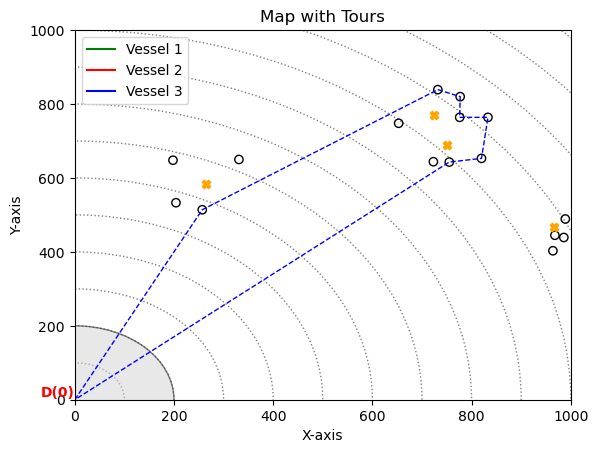

In [163]:
bx = show_the_map(problem)

bx = plot_some_trips(bx, processed_best, problem,1)

plt.show()

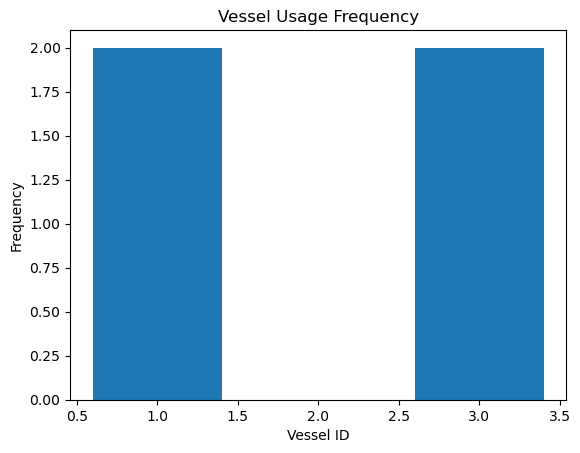

In [164]:
show_vessel_distribution(processed_best)

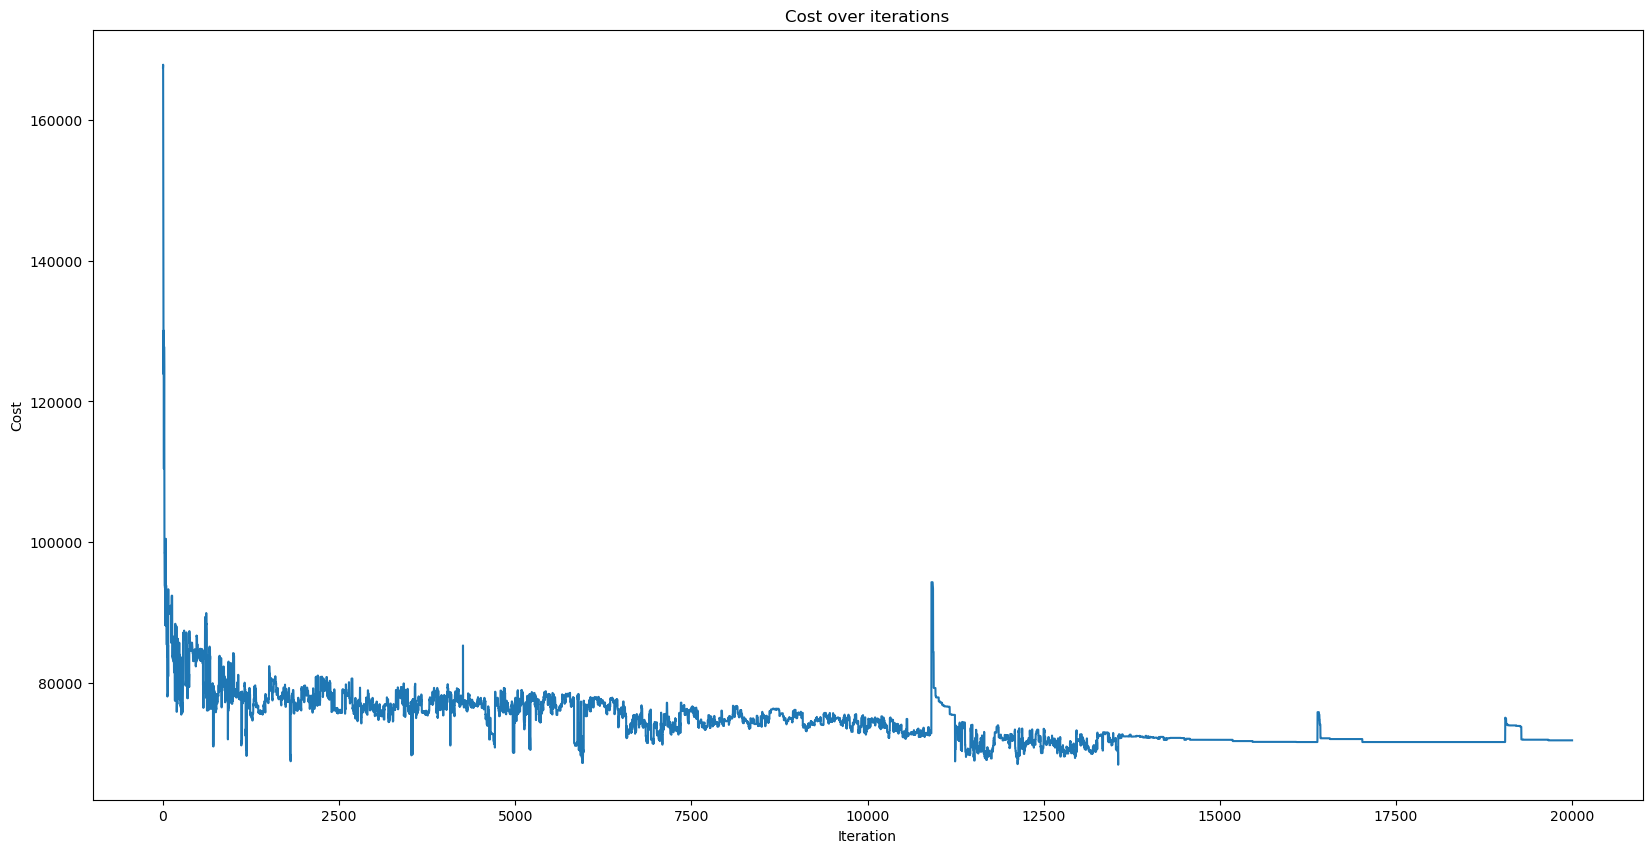

<Axes: title={'center': 'Cost over iterations'}, xlabel='Iteration', ylabel='Cost'>

In [165]:
plot_costs(costs)

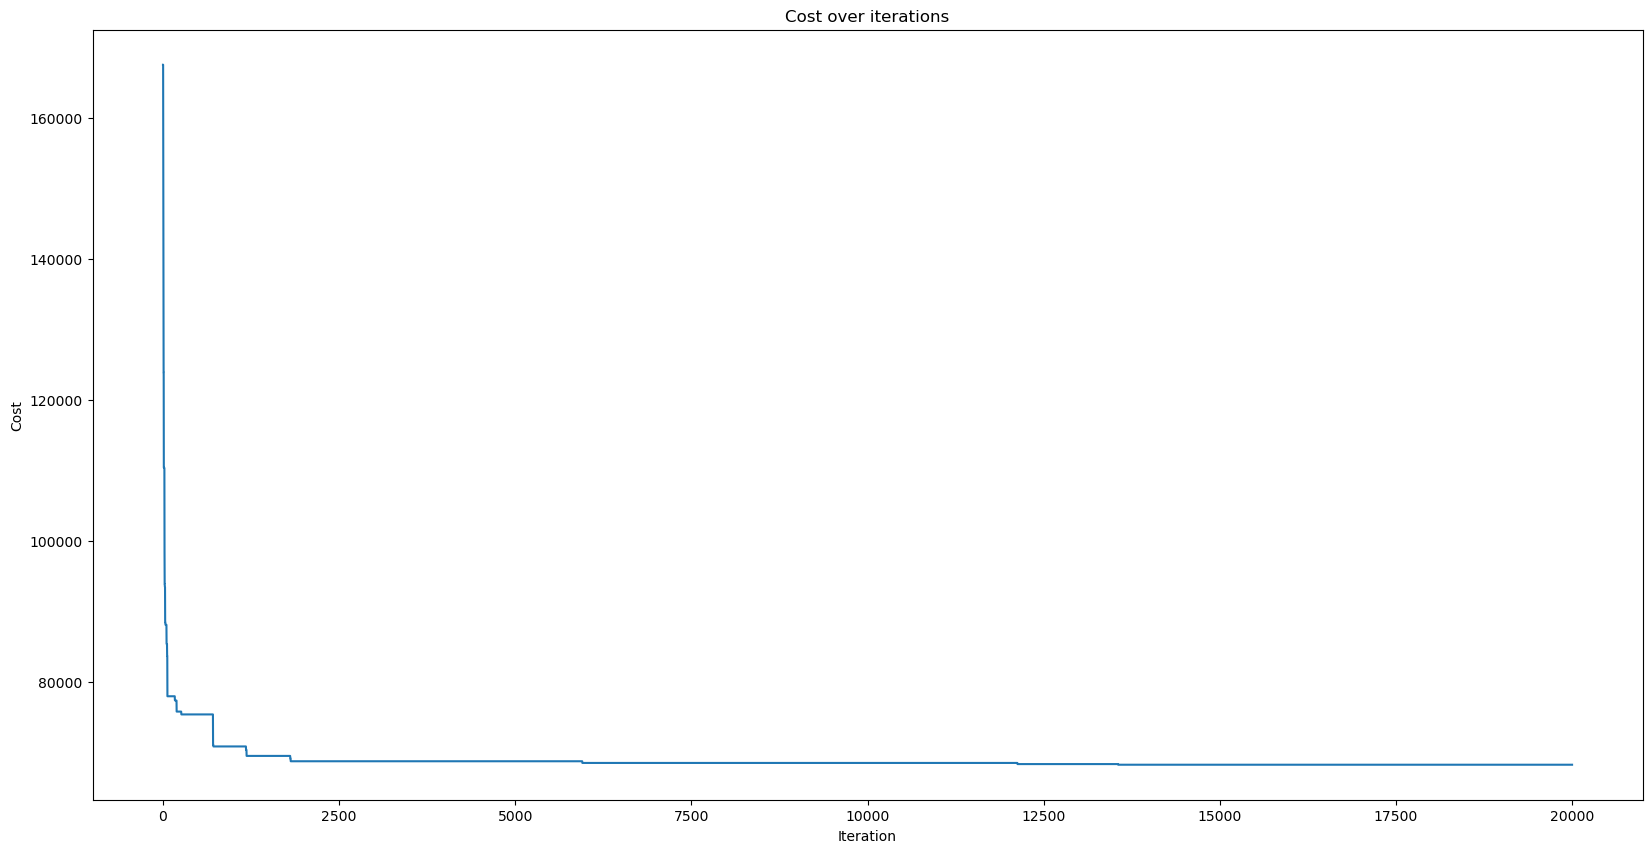

<Axes: title={'center': 'Cost over iterations'}, xlabel='Iteration', ylabel='Cost'>

In [166]:
plot_costs(best_costs)

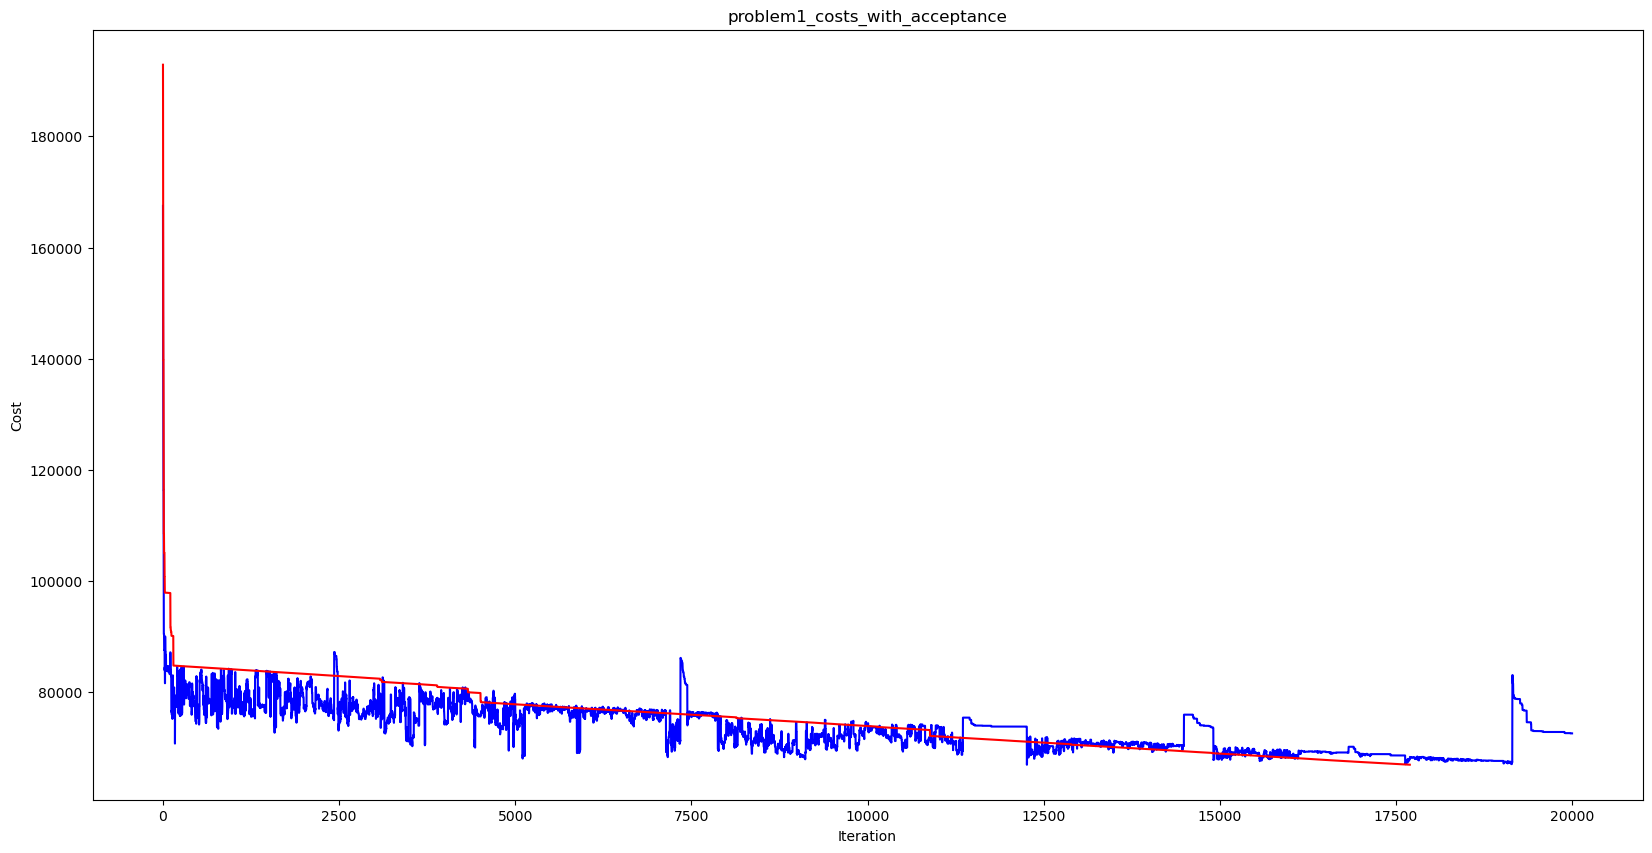

<Axes: title={'center': 'problem1_costs_with_acceptance'}, xlabel='Iteration', ylabel='Cost'>

In [93]:
multiple_plots(costs,accept_list,title='problem1_costs_with_acceptance')

17397
y = -1.85x + 98734.64


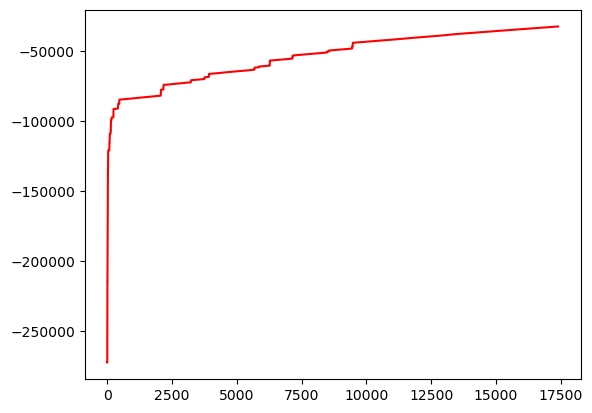

In [80]:
test = accept_list

print(len(accept_list))

coefficients = np.polyfit(range(len(test)), test, 1)
line = np.poly1d(coefficients)
plt.plot(range(len(test)), line(test), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
print(equation)

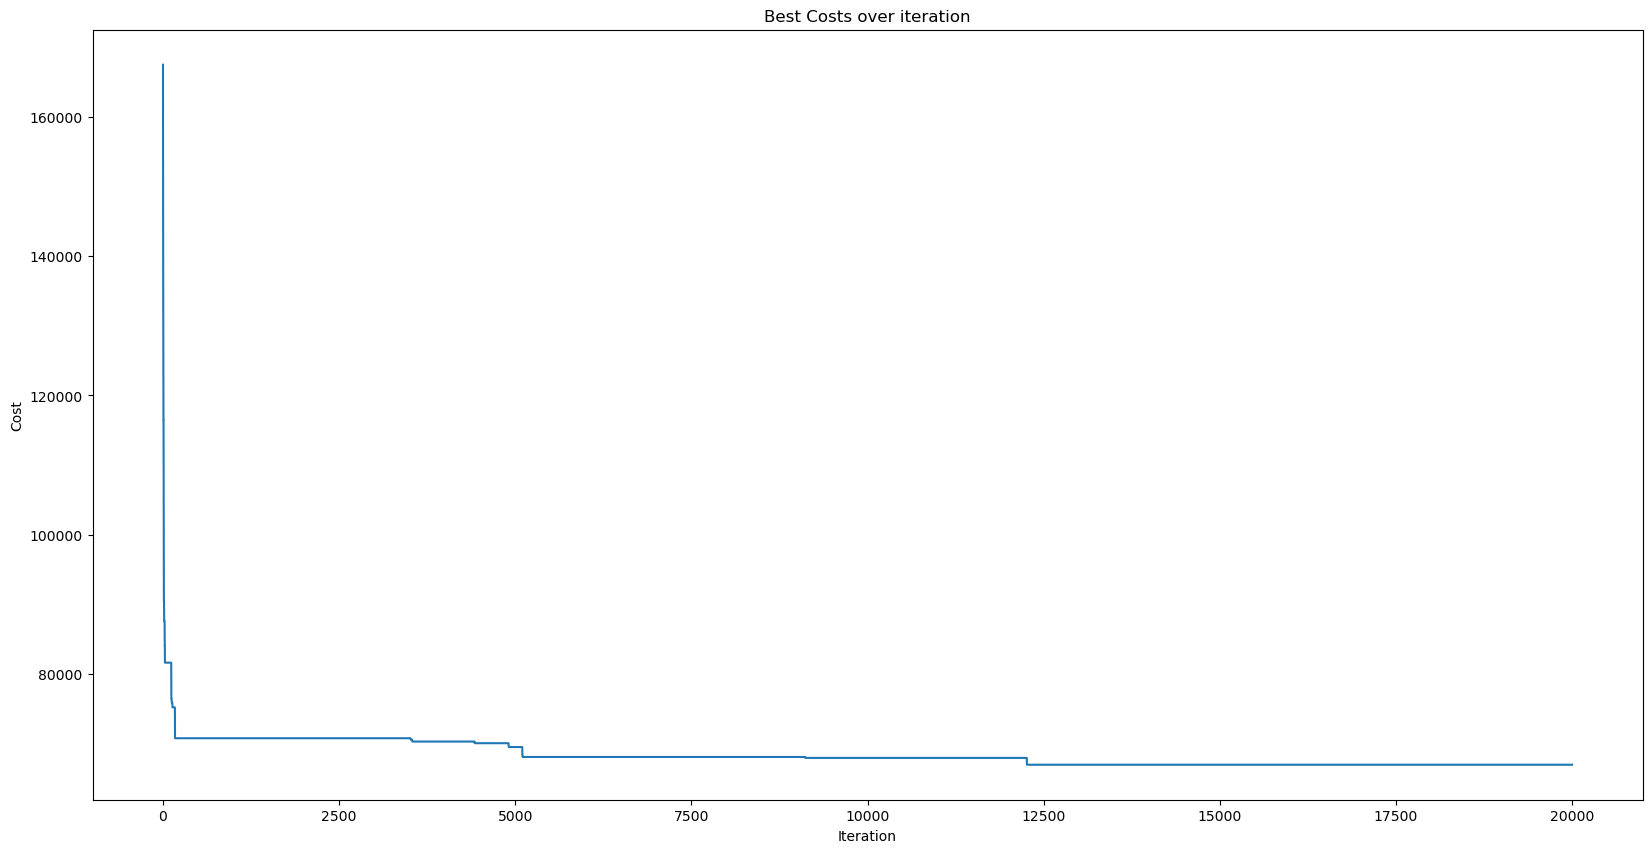

<Axes: title={'center': 'Best Costs over iteration'}, xlabel='Iteration', ylabel='Cost'>

In [94]:
plot_costs(best_costs,title='Best Costs over iteration')

In [19]:
best_solution

[(7, 0),
 (6, 0),
 (18, 1),
 (20, 0),
 (20, 1),
 (5, 1),
 (10, 0),
 (10, 1),
 (0, 0),
 (13, 0),
 (16, 0),
 (16, 1),
 (15, 0),
 (15, 1),
 (18, 0),
 (14, 1),
 (0, 0),
 (14, 0),
 (5, 0),
 (19, 1),
 (8, 0),
 (8, 1),
 (6, 1),
 (13, 1),
 (0, 0),
 (11, 0),
 (11, 1),
 (12, 0),
 (12, 1),
 (9, 0),
 (9, 1),
 (19, 0),
 (7, 1),
 (17, 0),
 (17, 1),
 (0, 0)]

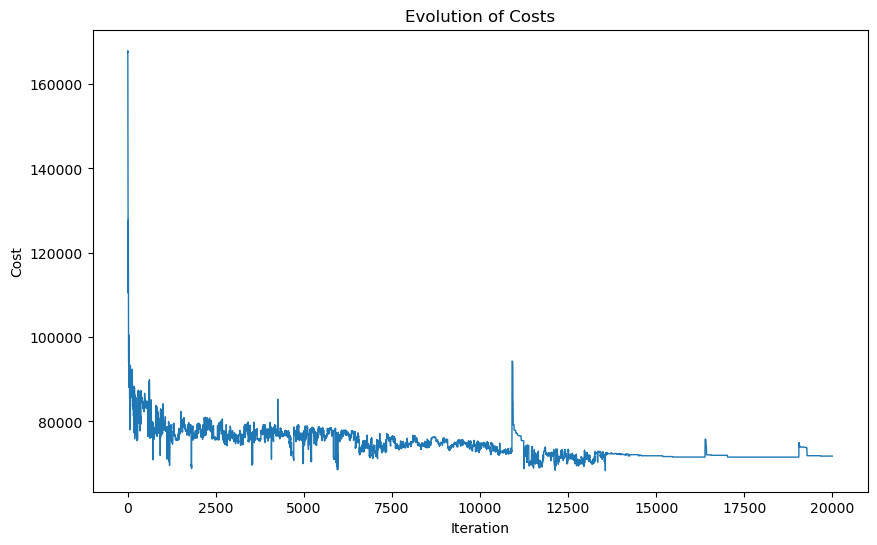

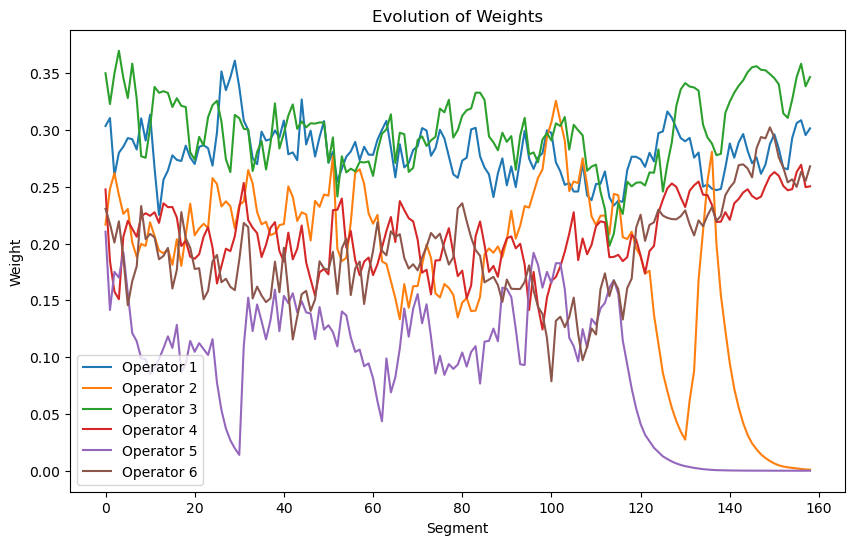

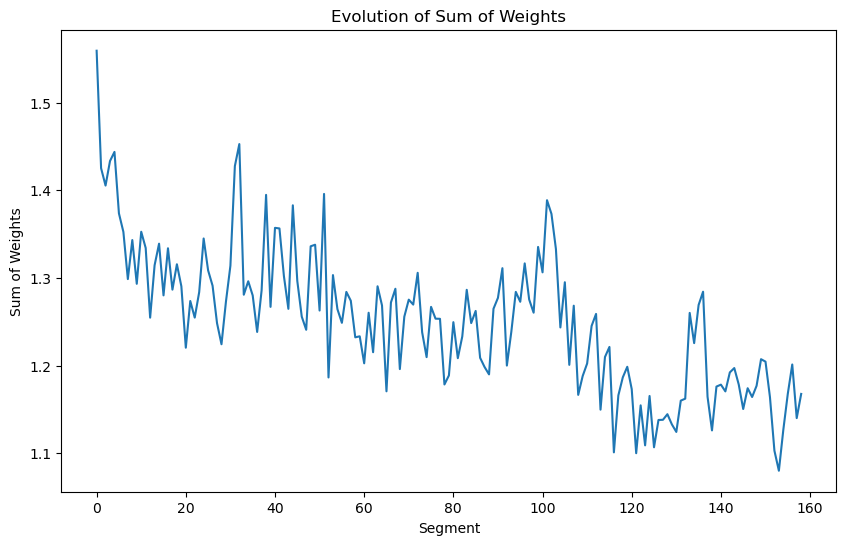

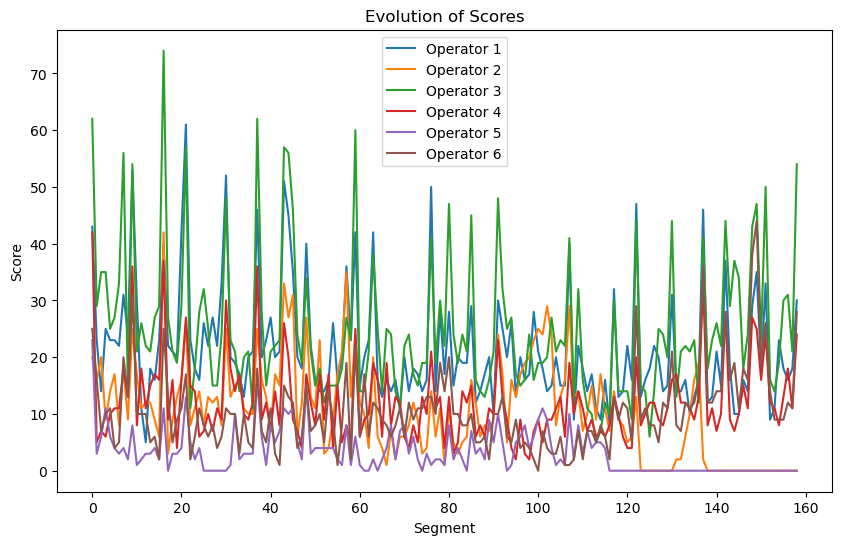

In [167]:
plot_output_lists(costs,all_weights,all_scores)

In [38]:
def multiple_ALNS_runs(initial, problem,operators,n_runs):
    best_solution = initial
    best_cost = objective_function(initial,problem)
    cost_lists = []
    best_costs_lists = []
    final_improve = []
    avg_cost = []
    t0 = time.time()
    for i in range(n_runs):
        print(f'Starting run {i+1}')
        _,processed_best,cost,best_costs,costs,_,_,_,final_improvement,_,_ = ALNS(initial,problem,operators)
        cost_lists.append(costs)
        best_costs_lists.append(best_costs)
        final_improve.append(final_improvement)
        avg_cost.append(cost)
        if cost<best_cost:
            best_solution = processed_best
            best_cost = cost
        
    t1 = time.time()-t0
    print(f'Finished {n_runs} runs in {t1:.2f} seconds')
    avg_cost = sum(avg_cost)/n_runs
    final_improve = sum(final_improve)/n_runs
    cost_lists = [sum(values) / len(values) for values in zip(*cost_lists)]
    best_costs_lists = [sum(values) / len(values) for values in zip(*best_costs_lists)]
    
    
    return best_solution,avg_cost,best_cost,best_costs_lists,cost_lists,final_improve,t1/n_runs

In [39]:
def RunAll(problems,operators,n_runs):
    results = {}
    for i in range(len(problems)):
        problem = problems[i]
        print(f'Starting problem {i+1}')
        initial = initial_solution(problem,problem['N_trips'])
        best_solution,avg_cost,best_cost,best_costs_lists,cost_lists,final_improve,time = multiple_ALNS_runs(initial,problem,operators,n_runs)
        results[i+1]=(best_solution,avg_cost,best_cost,best_costs_lists,cost_lists,final_improve,time)
    return results

In [40]:
results = RunAll(problems,operators,2)

Starting problem 1
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 1)]
Starting run 1
Weights: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Escape at 12087
Escape at 14454
Starting run 2
Weights: [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Escape at 4558
Escape at 6897
Escape at 9279
Finished 2 runs in 67.23 seconds
Starting problem 2
Initial Solution:           [(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1), (10, 0), (10, 1), (11, 0), (11, 1), (12, 0), (12, 1), (13, 0), (13, 1), (14, 0), (14, 1), (15, 0), (15, 1), (16, 0), (16, 1), (17, 0), (17, 1), (18, 0), (18, 1), (19, 0), (19, 1), (20, 0), (20, 

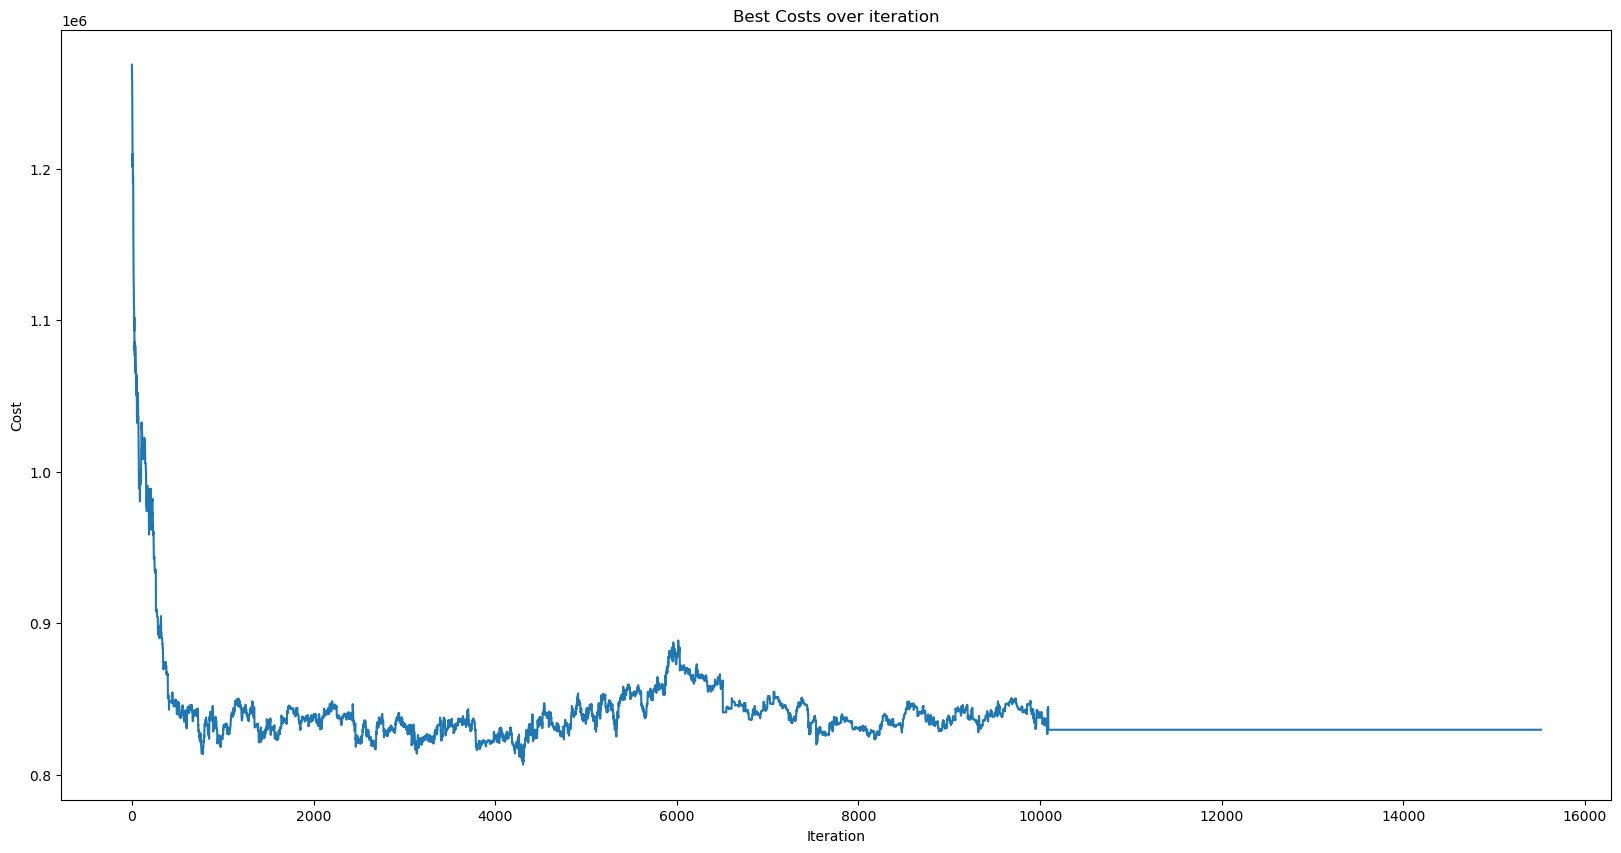

<Axes: title={'center': 'Best Costs over iteration'}, xlabel='Iteration', ylabel='Cost'>

In [46]:
plot_costs(results[5][4],title='Best Costs over iteration')

In [60]:
keys = results.keys()
print(keys)
final_imps = [results[key][5] for key in keys]
print(final_imps)


dict_keys([1, 2, 3, 4, 5, 6])
[19335.5, 10004.5, 1899.5, 6549.5, 2409.5, 16320.0]


In [4]:
def ExperimentI(problem,trip_range):
    
    charge_lists = []
    n_vessels = []
    best_costs = []
    
    
    operators = [random_remove_greedy_insert,largest_trip_remove_greedy_insert,similarity_removal_greedy_insert]
    
    for i in trip_range:
        print(f'Starting iteration with {i} Vessels')
        inital = initial_solution(problem,n_trips=i)
        _,processed_best,best_cost,_,_,_,_,_,_,_ = ALNS(inital,problem,operators)
        charging = processed_best[2]
        charging_amount = sum(len(sublist) for sublist in charging)
        best_costs.append(best_cost)
        charge_lists.append(charging_amount)
        n_vessels.append(i)
        
    return n_vessels,charge_lists,best_costs

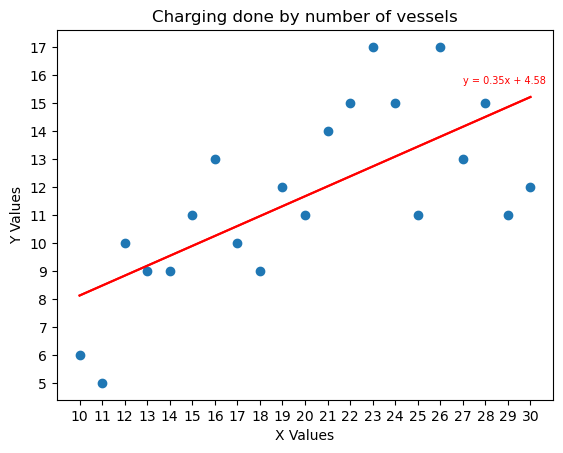

In [46]:


# Create the scatterplot
plt.scatter(n_vessels, chargelist)


# Add labels and title
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Charging done by number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed
yticks = np.arange(min(chargelist), max(chargelist)+1, step=1)  # change step value as needed
plt.xticks(xticks)
plt.yticks(yticks)

coefficients = np.polyfit(n_vessels, chargelist, 1)
line = np.poly1d(coefficients)
plt.plot(n_vessels, line(n_vessels), 'r-')
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'

# Add the equation to the plot
plt.text(max(n_vessels)-3, line(max(n_vessels))*1.05, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()


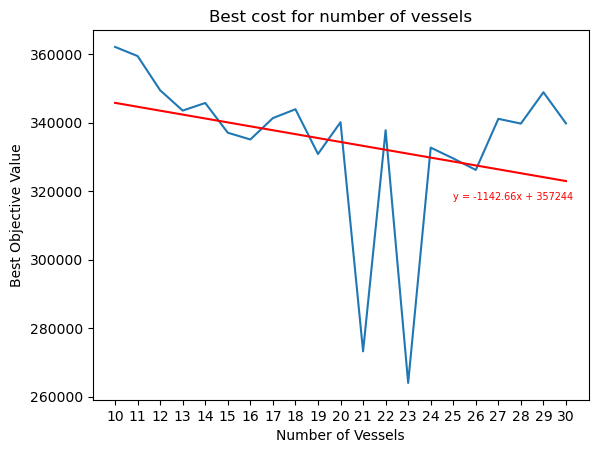

In [45]:
# Create the scatterplot
plt.plot(n_vessels, best_costs)

# Add labels and title
plt.xlabel('Number of Vessels')
plt.ylabel('Best Objective Value')
plt.title('Best cost for number of vessels')

xticks = np.arange(min(n_vessels), max(n_vessels)+1, step=1)  # change step value as needed

plt.xticks(xticks)

coefficients = np.polyfit(n_vessels, best_costs, 1)

line = np.poly1d(coefficients)
# Create the equation string
equation = f'y = {coefficients[0]:.2f}x + {coefficients[1]:.0f}'

# Add the equation to the plot
plt.text(max(n_vessels)-5, line(max(n_vessels))*0.99, equation, fontsize=7,color = 'red', verticalalignment='top')
plt.plot(n_vessels, line(n_vessels), 'r-')

# Display the plot
plt.show()